# **Title: Email Classification as Spam/Non-Spam**

Imporing the dataset file

In [210]:
!kaggle datasets download -d ashfakyeafi/spam-email-classification

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification
License(s): apache-2.0
  0% 0.00/207k [00:00<?, ?B/s]
100% 207k/207k [00:00<00:00, 93.3MB/s]


In [211]:
!unzip /content/spam-email-classification.zip

Archive:  /content/spam-email-classification.zip
  inflating: email.csv               


Importing the necessary Libraries

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [213]:
# Reading the data
Data = pd.read_csv('/content/email.csv')
Data.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [214]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [215]:
Data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [216]:
print('Number of Spam emails: ', Data['Category'].value_counts())

Number of Spam emails:  Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64


In [217]:
# there is a unique term "{"mode":"full ", we got to drop that row, for the it to be an accurate binary classification
Data = Data[~Data['Category'].str.contains('full', na=False)]
print('Number of Spam emails: ', Data['Category'].value_counts())

Number of Spam emails:  Category
ham     4825
spam     747
Name: count, dtype: int64


In [218]:
# Any Null rows
Data.isnull().sum()
# No Null values, so no need to drop any

,0
Category,0
Message,0


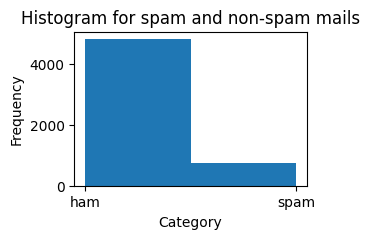

In [219]:
plt.figure(figsize=(3,2))
plt.hist(Data['Category'], bins =2)

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram for spam and non-spam mails')
plt.show()

Now, we start the preprocessing of the data

In [220]:
X = Data['Message']
Y = Data['Category']
X.head()

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [221]:
Y.head()

,Category
0,ham
1,ham
2,spam
3,ham
4,ham


In [222]:
Y.value_counts()

,count
Category,
ham,4825
spam,747


In [223]:
# Converting cetagories(spam/non-spam) to numeric veriables for training
lb = LabelEncoder()
Y = lb.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [224]:
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(X)

## Splitting Data



In [225]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=42)


# Logistic Regression






In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
model = LogisticRegression(max_iter=500, solver='saga', random_state=42)

In [228]:
start = time.time()
model.fit(X_train, y_train)
end = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [229]:
Logistic_Pred = model.predict(X_test)

precision = precision_score(y_test,Logistic_Pred)
accuracy = accuracy_score(y_test,Logistic_Pred)
recall = recall_score(y_test,Logistic_Pred)
f1_sc = f1_score(y_test,Logistic_Pred)
Logistic_CM = confusion_matrix(y_test, Logistic_Pred)
print('Time for Training: ', end - start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('confusion_matrix', Logistic_CM)

Time for Training:  1.2770071029663086
precision: 0.9855769230769231
accuracy: 0.9868421052631579
recall: 0.9151785714285714
f1_score: 0.9490740740740741
confusion_matrix [[1445    3]
 [  19  205]]


In [230]:
# Results of training
metrics = ['Precision', 'Accuracy', 'Recall', 'F1 Score', 'time']
Algorithms = ['SGD-Logistic Regression', 'K-Nearest Neighbors Classifier', 'K-Means Clustering',
              'Decisiion Tree Classifier', 'Random Forest Classification', 'Support Vector Machines']
Comparison = pd.DataFrame(columns = Algorithms, index = metrics)


Comparison['SGD-Logistic Regression'] = [precision, accuracy, recall, f1_sc, end - start]

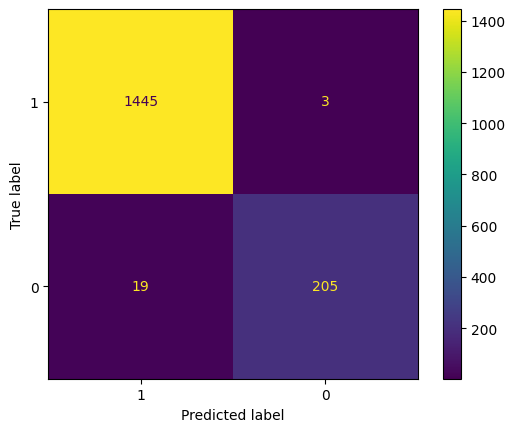

In [231]:
fig = ConfusionMatrixDisplay(Logistic_CM, display_labels=[1,0])
fig.plot()

K-Nearest Neighbors Classifier

In [232]:
from sklearn.neighbors import KNeighborsClassifier

In [233]:
KNN_model = KNeighborsClassifier(n_neighbors=1)
start = time.time()
KNN_model.fit(X_train, y_train)
end = time.time()

In [234]:
KNN_pred = KNN_model.predict(X_test)

precision = precision_score(y_test,KNN_pred)
accuracy = accuracy_score(y_test,KNN_pred)
recall = recall_score(y_test,KNN_pred)
f1_sc = f1_score(y_test,KNN_pred)
KNN_CM = confusion_matrix(y_test, KNN_pred)
print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', KNN_CM)

Time for Training:  0.002834320068359375
precision: 0.9866666666666667
accuracy: 0.9533492822966507
recall: 0.6607142857142857
f1_score: 0.7914438502673797
Confision Matrix [[1446    2]
 [  76  148]]


In [235]:
# Adding the results in comparison df
Comparison['K-Nearest Neighbors Classifier'] = [precision, accuracy, recall, f1_sc, end - start]

<Figure size 300x200 with 0 Axes>

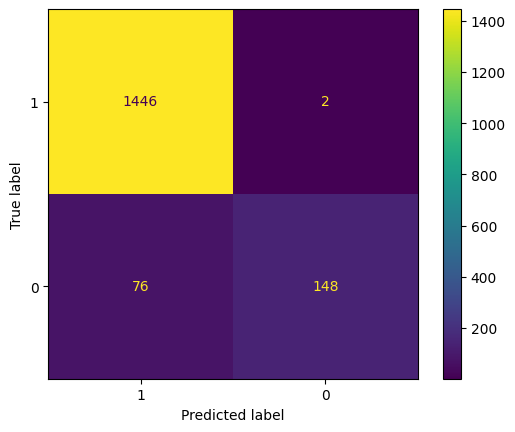

In [236]:
plt.figure(figsize=(3, 2))
fig = ConfusionMatrixDisplay(KNN_CM, display_labels= [1,0])
fig.plot()

K-Means Clustering

In [237]:
from sklearn.cluster import KMeans

In [263]:
kmeans = KMeans(n_clusters=2)

start = time.time()
kmeans.fit(X_train)
end = time.time()

In [264]:
KNN_cluster_pred = kmeans.predict(X_test)

precision = precision_score(y_test,KNN_cluster_pred)
accuracy = accuracy_score(y_test,KNN_cluster_pred)
recall = recall_score(y_test,KNN_cluster_pred)
f1_sc = f1_score(y_test,KNN_cluster_pred)
KNN_Cluster_CM = confusion_matrix(y_test, KNN_cluster_pred)
print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', KNN_Cluster_CM)

Time for Training:  0.05461001396179199
precision: 0.10422740524781342
accuracy: 0.21650717703349281
recall: 0.6383928571428571
f1_score: 0.17919799498746866
Confision Matrix [[ 219 1229]
 [  81  143]]


In [240]:
# Adding the results in comparison df
Comparison['K-Means Clustering'] = [precision, accuracy, recall, f1_sc, end - start]

<Figure size 300x200 with 0 Axes>

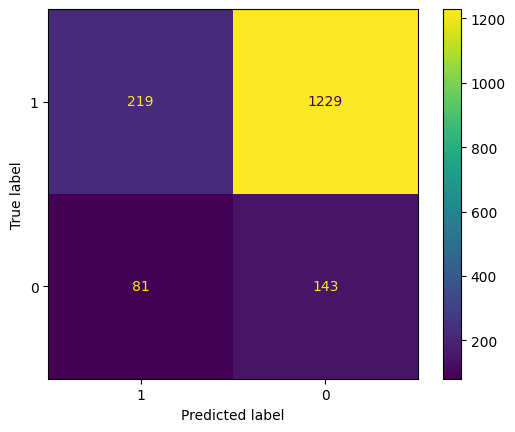

In [241]:
plt.figure(figsize=(3, 2))
fig = ConfusionMatrixDisplay(KNN_Cluster_CM, display_labels= [1,0])
fig.plot()

Decisiion Tree Classifier

In [242]:
from sklearn.tree import DecisionTreeClassifier

In [243]:
tree = DecisionTreeClassifier()

In [244]:
start = time.time()
tree.fit(X_train, y_train)
end = time.time()

In [245]:
tree_pred = tree.predict(X_test)

precision = precision_score(y_test,tree_pred)
accuracy = accuracy_score(y_test,tree_pred)
recall = recall_score(y_test,tree_pred)
f1_sc = f1_score(y_test,tree_pred)
tree_CM = confusion_matrix(y_test, tree_pred)
print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', tree_CM)

Time for Training:  1.4097068309783936
precision: 0.9069767441860465
accuracy: 0.9706937799043063
recall: 0.8705357142857143
f1_score: 0.8883826879271071
Confision Matrix [[1428   20]
 [  29  195]]


In [246]:
# Adding the results in comparison df
Comparison['Decisiion Tree Classifier'] = [precision, accuracy, recall, f1_sc, end - start]

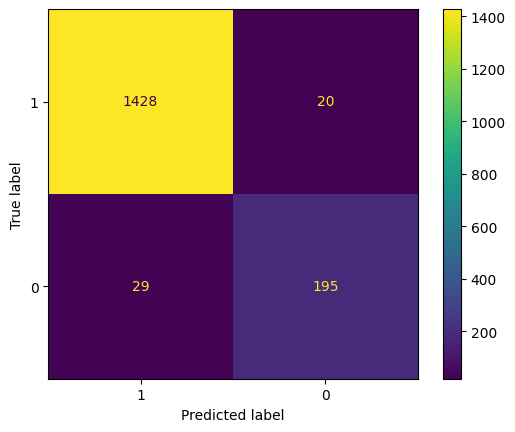

In [247]:
fig = ConfusionMatrixDisplay(tree_CM, display_labels= [1,0])
fig.plot()

Random Forest Classification

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
Random_forest = RandomForestClassifier(random_state=42)

In [250]:
start = time.time()
Random_forest.fit(X_train, y_train)
end = time.time()

In [251]:
Random_F_Pred = Random_forest.predict(X_test)

precision = precision_score(y_test,Random_F_Pred)
accuracy = accuracy_score(y_test,Random_F_Pred)
recall = recall_score(y_test,Random_F_Pred)
f1_sc = f1_score(y_test,Random_F_Pred)
RF_CM = confusion_matrix(y_test, Random_F_Pred)

print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', RF_CM)

Time for Training:  5.089048147201538
precision: 1.0
accuracy: 0.979066985645933
recall: 0.84375
f1_score: 0.9152542372881356
Confision Matrix [[1448    0]
 [  35  189]]


In [252]:
# Adding the results in comparison df
Comparison['Random Forest Classification'] = [precision, accuracy, recall, f1_sc, end - start]

<Figure size 200x200 with 0 Axes>

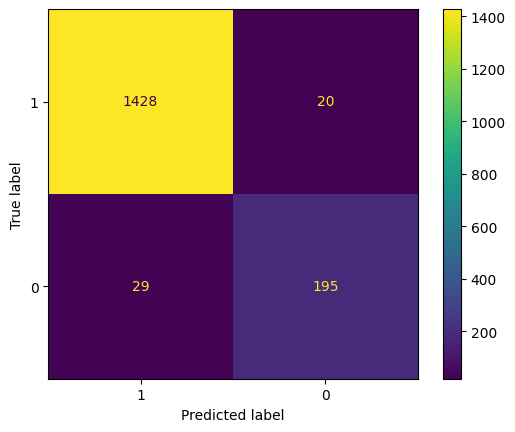

In [253]:
plt.figure(figsize=(2, 2))
fig = ConfusionMatrixDisplay(tree_CM, display_labels= [1,0])
fig.plot()

Support Vector Machines

In [254]:
from sklearn.svm import SVC

In [255]:
SVM_Model = SVC(kernel='linear')

In [256]:
start = time.time()
SVM_Model.fit(X_train,y_train)
end = time.time()

In [257]:
SVC_Pred = SVM_Model.predict(X_test)

precision = precision_score(y_test,SVC_Pred)
accuracy = accuracy_score(y_test,SVC_Pred)
recall = recall_score(y_test,SVC_Pred)
f1_sc = f1_score(y_test,SVC_Pred)
SVC_CM = confusion_matrix(y_test, SVC_Pred)

print('Time for Training: ', end-start)
print('precision:',  precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('f1_score:', f1_sc)
print('Confision Matrix', SVC_CM)

Time for Training:  0.4363248348236084
precision: 1.0
accuracy: 0.9874401913875598
recall: 0.90625
f1_score: 0.9508196721311475
Confision Matrix [[1448    0]
 [  21  203]]


In [258]:
# Adding the results in comparison df
Comparison['Support Vector Machines'] = [precision, accuracy, recall, f1_sc, end - start]

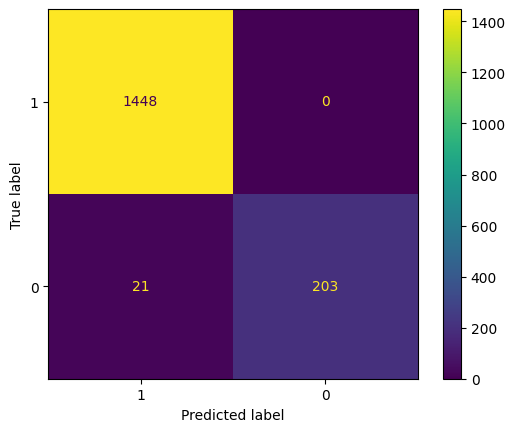

In [259]:
fig = ConfusionMatrixDisplay(SVC_CM, display_labels= [1,0])
fig.plot()

In [260]:
Comparison

,SGD-Logistic Regression,K-Nearest Neighbors Classifier,K-Means Clustering,Decisiion Tree Classifier,Random Forest Classification,Support Vector Machines
Precision,0.985577,0.986667,0.104227,0.906977,1.000000,1.000000
Accuracy,0.986842,0.953349,0.216507,0.970694,0.979067,0.987440
Recall,0.915179,0.660714,0.638393,0.870536,0.843750,0.906250
F1 Score,0.949074,0.791444,0.179198,0.888383,0.915254,0.950820
time,1.277007,0.002834,0.043892,1.409707,5.089048,0.436325


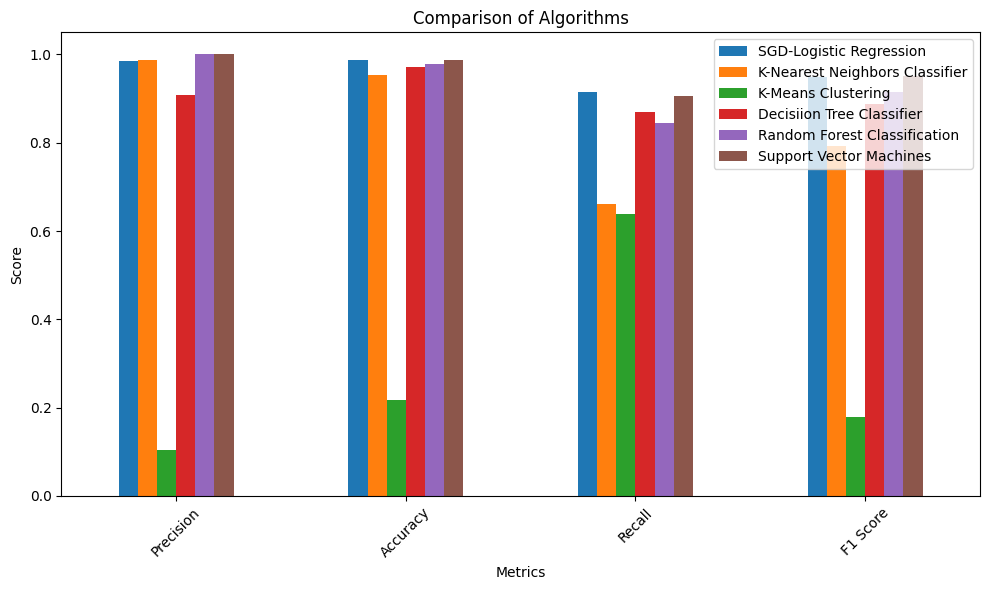

In [267]:
# prompt: Draw a comparison plot for the parameters obtained in the comparison plot of the different algorithms
Comparison = Comparison.drop('time')
Comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Algorithms')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# SVC PERFORMS BEST